In [639]:
import json
import requests
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

CDC by age

In [663]:
age_sex_data = pd.read_csv("Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#age_sex_data.head()

In [641]:
age_state = age_sex_data.loc[(age_sex_data['Sex'] == 'All Sexes')]
age_state = age_state.loc[age_state['Group']=='By Month']
age_state = age_state.loc[age_state['State']!='Puerto Rico']
age_state = age_state.loc[age_state['State']!='United States']
age_state = age_state.loc[age_state['State']!='District of Columbia']
age_data = age_state.loc[age_state['Age Group']!='All Ages']

In [642]:
del age_data['Footnote']
del age_data['Data As Of']
del age_data['Sex']
del age_data['Pneumonia Deaths']
del age_data['Pneumonia and COVID-19 Deaths']
del age_data['Influenza Deaths']
del age_data['Pneumonia, Influenza, or COVID-19 Deaths']

In [643]:
age_data = age_data.fillna(0)
#age_data.head()

In [644]:
by_age_data = age_data.reset_index(drop=True)
by_age_data.head()

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Under 1 year,0.0,31.0
1,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,0-17 years,0.0,71.0
2,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,1-4 years,0.0,12.0
3,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,5-14 years,0.0,16.0
4,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,15-24 years,0.0,56.0


In [645]:
by_age_data['Age Group'].unique()

array(['Under 1 year', '0-17 years', '1-4 years', '5-14 years',
       '15-24 years', '18-29 years', '25-34 years', '30-39 years',
       '35-44 years', '40-49 years', '45-54 years', '50-64 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

In [646]:
by_age_data.to_csv("Folder2/age-data.csv", index=False, header=True)

CDC by sex


In [647]:
sex_data = pd.read_csv("Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#sex_data.head()

In [648]:
all_ages = sex_data.loc[sex_data['Age Group'] == 'All Ages']
all_ages = all_ages.loc[all_ages['Group']=='By Month']
sex_state = all_ages.loc[all_ages['State']!='Puerto Rico']
sex_state = sex_state.loc[sex_state['State']!='United States']
sex_state = sex_state.loc[sex_state['State']!='District of Columbia']
sex_data = sex_state.loc[sex_state['Sex'] != 'All Sexes']

In [649]:
del sex_data['Footnote']
del sex_data['Data As Of']
del sex_data['Age Group']
del sex_data['Pneumonia Deaths']
del sex_data['Pneumonia and COVID-19 Deaths']
del sex_data['Influenza Deaths']
del sex_data['Pneumonia, Influenza, or COVID-19 Deaths']
sex_data = sex_data.fillna(0)

In [650]:
sex_data = sex_data.reset_index(drop=True)
sex_data.head()

,Start Date,End Date,Group,Year,Month,State,Sex,COVID-19 Deaths,Total Deaths
0,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Male,0.0,2400.0
1,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Female,0.0,2328.0
2,2/1/20,2/29/20,By Month,2020.0,2.0,Alabama,Male,0.0,2391.0
3,2/1/20,2/29/20,By Month,2020.0,2.0,Alabama,Female,0.0,2236.0
4,3/1/20,3/31/20,By Month,2020.0,3.0,Alabama,Male,31.0,2489.0


In [651]:
sex_data.to_csv("Folder2/sex-data.csv", index=False, header=True)

Race Data from CDC

In [652]:
race_ethnicity_data = pd.read_csv("Folder1/race-ethnicity.csv")

In [653]:
del race_ethnicity_data['Footnote']
del race_ethnicity_data['Data as of']

In [654]:
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['Group'] == 'By Month')]
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['State'] != 'United States')]
race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['State']!='District of Columbia']
race_ethnicity_data = race_ethnicity_data.fillna(0)
#race_ethnicity_data.head()

In [665]:
race_ethnicity_data.rename(columns={"Non-Hispanic White": "White", "Non-Hispanic Black or African American": "Black or African American", "Non-Hispanic American Indian or Alaska Native":
                               "American Indian or Alaska Native", "Non-Hispanic Asian": "Asian", "Non-Hispanic Native Hawaiian or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
                               "Deaths_AIAN": "Deaths: AIAN", "Deaths_NHPI": "Deaths: NHPI", "Deaths_Multiracial": "Deaths: Multiracial",
                               "Non Hispanic more than one race": "More Than One Race"})
race_ethnicity_data.head(2)

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
0,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Distribution of COVID-19 deaths (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [656]:
race_ethnicity_data = race_ethnicity_data.reset_index(drop=True)

In [657]:
race_ethnicity_data.to_csv("Folder2/race-population-data.csv", index=False, header=True)

trying to merge

In [658]:
race_data = pd.read_csv("Folder2/race-population-data.csv")
race_data.head()

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
0,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Distribution of COVID-19 deaths (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Unweighted distribution of population (%),65.3,26.5,0.6,1.5,0.1,1.6,4.6
3,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Weighted distribution of population (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,02/01/2020,02/29/2020,2020,2.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [660]:
age_data = pd.read_csv("Folder2/age-data.csv")
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Under 1 year,0.0,31.0
1,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,0-17 years,0.0,71.0
2,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,1-4 years,0.0,12.0
3,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,5-14 years,0.0,16.0
4,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,15-24 years,0.0,56.0
...,...,...,...,...,...,...,...,...,...
13051,4/1/21,4/24/21,By Month,2021.0,4.0,Wyoming,50-64 years,0.0,36.0
13052,4/1/21,4/24/21,By Month,2021.0,4.0,Wyoming,55-64 years,0.0,33.0
13053,4/1/21,4/24/21,By Month,2021.0,4.0,Wyoming,65-74 years,0.0,36.0
13054,4/1/21,4/24/21,By Month,2021.0,4.0,Wyoming,75-84 years,0.0,31.0


In [661]:
sex_data = pd.read_csv("Folder2/sex-data.csv")
sex_data

,Start Date,End Date,Group,Year,Month,State,Sex,COVID-19 Deaths,Total Deaths
0,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Male,0.0,2400.0
1,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Female,0.0,2328.0
2,2/1/20,2/29/20,By Month,2020.0,2.0,Alabama,Male,0.0,2391.0
3,2/1/20,2/29/20,By Month,2020.0,2.0,Alabama,Female,0.0,2236.0
4,3/1/20,3/31/20,By Month,2020.0,3.0,Alabama,Male,31.0,2489.0
...,...,...,...,...,...,...,...,...,...
1627,2/1/21,2/28/21,By Month,2021.0,2.0,Wyoming,Female,25.0,195.0
1628,3/1/21,3/31/21,By Month,2021.0,3.0,Wyoming,Male,0.0,208.0
1629,3/1/21,3/31/21,By Month,2021.0,3.0,Wyoming,Female,0.0,191.0
1630,4/1/21,4/24/21,By Month,2021.0,4.0,Wyoming,Male,0.0,82.0


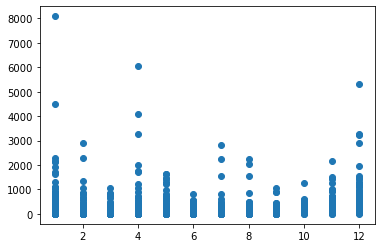

In [673]:
filtered_data = sex_data.loc[sex_data['Sex']=='Female']
filtered_male = sex_data.loc[sex_data['Sex']=='Male']

y_axis = []
y_axis = filtered_data['COVID-19 Deaths'].tolist()
#male_sum = filtered_male['COVID-19 Deaths'].sum()

x_axis = []
x_axis = filtered_data['Month'].tolist()

#x_axis_data = ['Female', 'Male']

plt.scatter(x_axis, y_axis)
plt.show()